In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from scipy import stats

In [2]:
n = int(input("Enter the Range of data. ")) # n is for total number of observation
data_set = []
print("Enter the data ")
for i in range(0,n):
    input_ = float(input())
    data_set.append(input_)
print(data_set)

Enter the Range of data. 10
Enter the data 
3.3
3.54
3.99
3.16
2.22
2.69
2.7
2.66
1.50
1.22
[3.3, 3.54, 3.99, 3.16, 2.22, 2.69, 2.7, 2.66, 1.5, 1.22]


In [3]:
#Task 1
max_num = float(max(data_set))
min_num = float(min(data_set))
print(f'Max number is {max_num} and the minimum number is {min_num}')
#calculate the range
rang = round((max_num - min_num), 2)
print(rang)

Max number is 3.99 and the minimum number is 1.22
2.77


In [4]:
#Task 2
#Find the classes
cls = (1+ (3.33) * math.log10(n)) ## log k sath jo 10 likha ye base hai aur ye standard hai
# Round up kia hai 
no_of_classes = math.ceil(cls)
print(no_of_classes)

5


In [5]:
#Task 3 
# Class width/Class interval = range / no of classes
x = float((rang/no_of_classes))
# Round the class width up to the nearest hundredth
y = round(x, 2)
cw = y
# if cw >= max_num: 
#     cw = y
# elif cw < max_num:
#     cw = math.ceil(y)
print(cw)

0.55


In [6]:
#Task 4 
#Class Limit
lcl = []
ucl = []
for i in range(no_of_classes):
    lower_lim = round(float((min_num + i * cw)), 2)
    upper_lim = round(float((lower_lim + cw) - (0.01)), 2)
    lcl.append(lower_lim)
    ucl.append(upper_lim)
print(f'{lcl} - {ucl}')

[1.22, 1.77, 2.32, 2.87, 3.42] - [1.76, 2.31, 2.86, 3.41, 3.96]


In [7]:
#Task 5 
# Find the freq
freq = []

# loop over each class limit range
for i in range(len(lcl)):
    lower = lcl[i]
    upper = ucl[i]
    
    # count the number of values in data_set that fall within the range
    count = sum(lower <= x <= upper for x in data_set)
    
    # append the count to the frequency list
    freq.append(count)
if len(data_set) == sum(freq):
    print('You Got Right frequency')
    print(freq)

In [8]:
# Task 6
# find the class boundaries = (lcl - 0.5) and (ucl + 0.5)
lcl_bound = []
ucl_bound = []
for x in range(len(lcl)):
    if x == 0:
        temp_lb = lcl[x] - 0.5
    else:
        temp_lb =  temp_ul
    temp_ul = ucl[x] + 0.5 
    lcl_bound.append(temp_lb)
    ucl_bound.append(temp_ul)

In [9]:
#Task 7
#find the Mid point (mid = lcl - ucl)/2
mid_point = []
for x in range(len(lcl)):
    val = round(((lcl[x] + ucl[x]) / 2), 2)
    mid_point.append(val)
print(mid_point)

[1.49, 2.04, 2.59, 3.14, 3.69]


In [10]:
# Task 8
# Cumultative freq cf and relative freq
cum_f = []
rf = []
temp = 0.00
for i in range(len(freq)):
    val = round((freq[i] / len(data_set)), 2)
    rf.append(val)
    if i == 0:
        temp = freq[i]
        cum_f.append(temp)
    else:
        temp = temp + freq[i]
        cum_f.append(temp)
print("Sum of Cumulative freq is ", sum(cum_f))
print(cum_f)
print("Sum of freq is ", sum(data_set))
print(rf)

Sum of Cumulative freq is  28
[2, 3, 6, 8, 9]
Sum of freq is  26.98
[0.2, 0.1, 0.3, 0.2, 0.1]


In [11]:
colum = [lcl, ucl, freq]
# df = pd.DataFrame(colum, row )
df = pd.DataFrame({'LCL': lcl, 'UCL': ucl, 'LCL_Boud(-0.5)': lcl_bound, 'UCL_Bound(+0.5)': ucl_bound, 
                   'Mid Point': mid_point, 'Freq': freq, 'CF': cum_f, 'RF': rf})
print(df)

    LCL   UCL  LCL_Boud(-0.5)  UCL_Bound(+0.5)  Mid Point  Freq  CF   RF
0  1.22  1.76            0.72             2.26       1.49     2   2  0.2
1  1.77  2.31            2.26             2.81       2.04     1   3  0.1
2  2.32  2.86            2.81             3.36       2.59     3   6  0.3
3  2.87  3.41            3.36             3.91       3.14     2   8  0.2
4  3.42  3.96            3.91             4.46       3.69     1   9  0.1


### Create a histogram plot

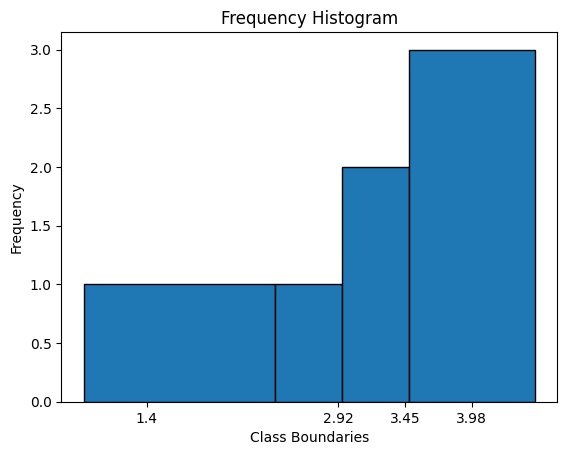

In [12]:
# Plot the histogram
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Class Boundaries')

plt.hist(lcl_bound, bins=lcl_bound+[max(lcl_bound)+1], weights=freq, edgecolor='black')

# Set the x-Axis ticks to the middle of each class
plt.xticks([lcl_bound[i]+0.5 for i in range(len(lcl_bound))], lcl_bound)

# Display the plot
plt.show()

### Create a PolyGon

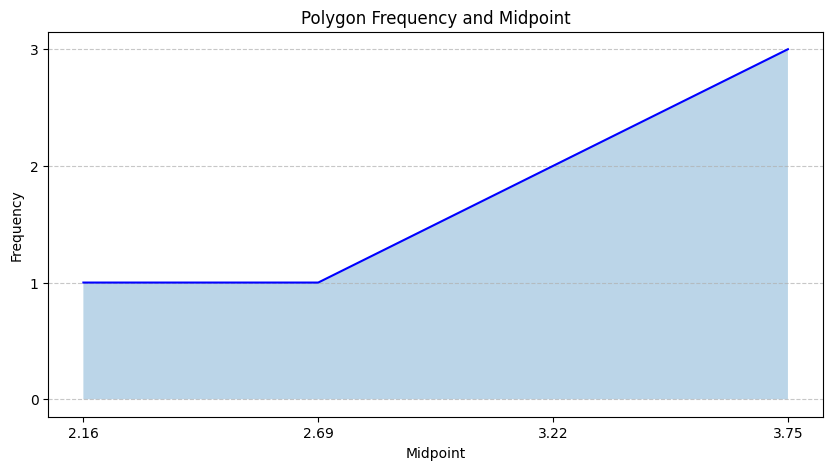

In [13]:
# plot polygon frequency and midpoint
plt.figure(figsize=(10, 5))
plt.title('Polygon Frequency and Midpoint')
plt.xlabel('Midpoint')
plt.ylabel('Frequency')
plt.xticks(mid_point)
plt.yticks(range(0, max(freq) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.fill_between(mid_point, freq, alpha=0.3)
plt.plot(mid_point, freq, color='blue')
plt.show()

### OGIVE Graph

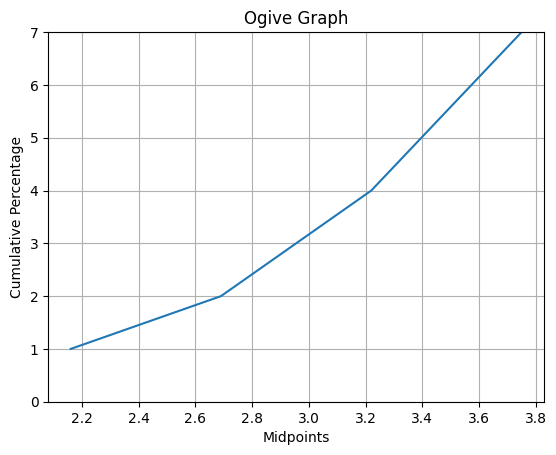

In [14]:
# Create a new figure and axis
fig, ax = plt.subplots()

# Plot a line graph of cumulative percentage against midpoints
ax.plot(mid_point, cum_f)

# Set the y-axis to be between 0 and 100
# ax.set_ylim(cum_f)
ax.set_ylim([0, max(cum_f)])


# Add a grid to the plot
ax.grid(True)

# Add x and y-axis labels
ax.set_xlabel('Midpoints')
ax.set_ylabel('Cumulative Percentage')

# Add a title to the plot
ax.set_title('Ogive Graph')

# Show the plot
plt.show()

### PIE Chart 

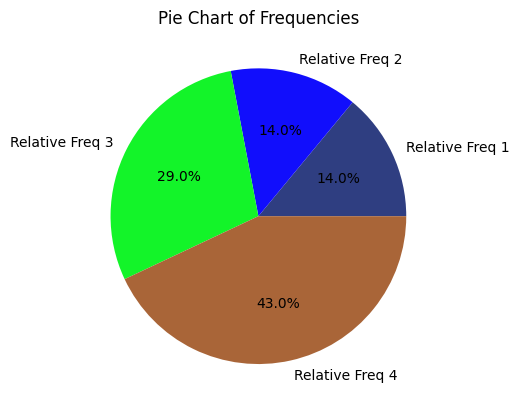

In [15]:
num_freqs = len(rf)
# Generate random frequencies
freqs = rf

# Generate random colors
colors = [(np.random.rand(), np.random.rand(), np.random.rand()) for _ in range(num_freqs)]

# Create a pie chart with automatic labels and colors
fig, ax = plt.subplots()
ax.pie(freqs, labels=['Relative Freq {}'.format(i+1) for i in range(num_freqs)], autopct='%1.1f%%', colors=colors)
ax.set_title('Pie Chart of Frequencies')

plt.show()